<a href="https://colab.research.google.com/github/GraceMinai/CurrencyCalculator/blob/master/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#configuring the path of kaggle.json file
#Install the Kaggle library
! pip install kaggle



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.youtube.com/watch?v=pHq29zi4Gr0

In [ ]:
#Make a directory named “.kaggle”
! mkdir ~/.kaggle



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

Importing the DOg Vs Cat Dataset from Kaggle


In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:03<00:00, 181MB/s]
100% 812M/812M [00:04<00:00, 210MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [ ]:
#extratcing the compressed file
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

#opening the file and reading it as a .zip file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")


The dataset is extracted


In [ ]:
#extratcing the compressed file
from zipfile import ZipFile

dataset = "/content/train.zip"

#opening the file and reading it as a .zip file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The train dataset is extracted")

The train dataset is extracted


In [ ]:
import os
#countiung the no. of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)


Number of images: 25000


Printing the names of images </br>
These are the names of all the files that are in the train folder. 

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.7039.jpg', 'dog.6838.jpg', 'cat.2218.jpg', 'dog.4089.jpg', 'cat.2890.jpg', 'dog.1869.jpg', 'dog.1439.jpg', 'cat.2933.jpg', 'cat.11652.jpg', 'dog.5941.jpg', 'dog.10044.jpg', 'cat.6434.jpg', 'cat.3203.jpg', 'cat.7989.jpg', 'dog.12174.jpg', 'dog.4985.jpg', 'cat.5245.jpg', 'cat.2608.jpg', 'cat.1897.jpg', 'cat.5105.jpg', 'dog.705.jpg', 'cat.6531.jpg', 'cat.6803.jpg', 'dog.1744.jpg', 'cat.5030.jpg', 'cat.2967.jpg', 'cat.5379.jpg', 'dog.10021.jpg', 'cat.11606.jpg', 'cat.2344.jpg', 'cat.8758.jpg', 'dog.11111.jpg', 'cat.1468.jpg', 'dog.6711.jpg', 'dog.8217.jpg', 'dog.5592.jpg', 'dog.488.jpg', 'cat.344.jpg', 'dog.4266.jpg', 'dog.1663.jpg', 'cat.4069.jpg', 'cat.6391.jpg', 'dog.666.jpg', 'dog.2428.jpg', 'cat.6902.jpg', 'dog.5987.jpg', 'cat.3965.jpg', 'cat.8756.jpg', 'cat.5950.jpg', 'cat.10514.jpg', 'dog.10594.jpg', 'cat.10959.jpg', 'dog.4991.jpg', 'cat.6876.jpg', 'dog.1285.jpg', 'cat.6257.jpg', 'dog.249.jpg', 'dog.6472.jpg', 'cat.10219.jpg', 'cat.6272.jpg', 'dog.11143.jpg', 'cat.3338.jpg', '

Importing all the required libararies and dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dogs and cats

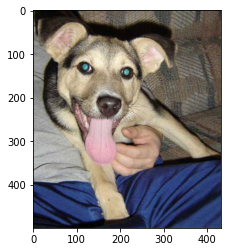

In [ ]:
#Displaying dog image
img = mpimg.imread('/content/train/dog.7537.jpg')
imgplt = plt.imshow(img)
plt.show()

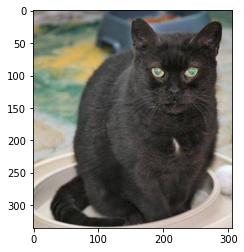

In [ ]:
#Displaying cat image
img = mpimg.imread('/content/train/cat.8682.jpg')
imgplt = plt.imshow(img)
plt.show()

As we can see, the images above are of different sizes <br>
Training a Neural Network needs the images to be of the same sizes</br>
We have to re-size the images to one common pixel values


In [ ]:
#creating a different directory and save the re-sized imgaes into the new folder
#Creating a for-loop to figure out how many dogs/cats are in the train folder

file_names = os.listdir('/content/train')
#for img_file in file_names:

for i in range (5):
  print(file_names[i])

dog.7039.jpg
dog.6838.jpg
cat.2218.jpg
dog.4089.jpg
cat.2890.jpg


In [ ]:
for i in range (5):

  name = file_names[i]

  #printing the first 3 letters
  print(name[0:3])

dog
dog
cat
dog
cat


Resizing the images

In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  
  else: 
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#Creating a directory for re-sized images 
os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

#out of the 25,000 images, we need only 2000 for training

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  #print(filename)
  
  img_path = original_folder + filename
  #print(img_path)

  #Using the PIL library
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  #saving the resized images in the new directory
  newImgPath = resized_folder + filename
  img.save(newImgPath)
  print(newImgPath)
    


/content/image_resized/dog.7039.jpg
/content/image_resized/dog.6838.jpg
/content/image_resized/cat.2218.jpg
/content/image_resized/dog.4089.jpg
/content/image_resized/cat.2890.jpg
/content/image_resized/dog.1869.jpg
/content/image_resized/dog.1439.jpg
/content/image_resized/cat.2933.jpg
/content/image_resized/cat.11652.jpg
/content/image_resized/dog.5941.jpg
/content/image_resized/dog.10044.jpg
/content/image_resized/cat.6434.jpg
/content/image_resized/cat.3203.jpg
/content/image_resized/cat.7989.jpg
/content/image_resized/dog.12174.jpg
/content/image_resized/dog.4985.jpg
/content/image_resized/cat.5245.jpg
/content/image_resized/cat.2608.jpg
/content/image_resized/cat.1897.jpg
/content/image_resized/cat.5105.jpg
/content/image_resized/dog.705.jpg
/content/image_resized/cat.6531.jpg
/content/image_resized/cat.6803.jpg
/content/image_resized/dog.1744.jpg
/content/image_resized/cat.5030.jpg
/content/image_resized/cat.2967.jpg
/content/image_resized/cat.5379.jpg
/content/image_resized/dog

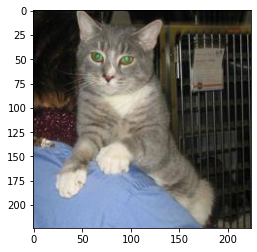

In [ ]:
#Displaying RESIZED cat image
img = mpimg.imread('/content/image_resized/cat.4556.jpg')
imgplt = plt.imshow(img)
plt.show()

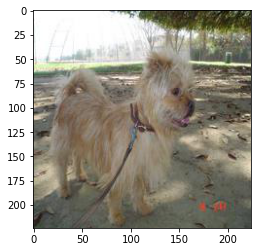

In [ ]:
#Displaying RESIZED dog image
img = mpimg.imread('/content/image_resized/dog.5829.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats </br>
Cat --> 0 </br>
Dog --> 1 </br>

In [ ]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image_resized')

labels = []

for i in range (2000):
  file_name = filenames[i]

  #Taking the first three letters of the file names
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))
print(labels[0:5])

['dog.7039.jpg', 'dog.6838.jpg', 'cat.2218.jpg', 'dog.4089.jpg', 'cat.2890.jpg']
2000
[1, 1, 0, 1, 0]


In [ ]:
#Training data is 2000
#WE want to check, the dog and cat ratio distribution
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 992 1008]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob
import numpy as np

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])



In [ ]:
print(dog_cat_images)

[[[[201 199 205]
   [201 199 205]
   [200 198 204]
   ...
   [ 96 103 122]
   [ 98 104 123]
   [ 99 105 124]]

  [[201 199 205]
   [201 199 205]
   [200 198 204]
   ...
   [ 93 100 119]
   [ 96 102 121]
   [ 98 104 123]]

  [[201 199 205]
   [201 199 205]
   [200 198 204]
   ...
   [ 94 101 120]
   [ 96 102 121]
   [ 98 104 123]]

  ...

  [[223 217 218]
   [229 223 224]
   [239 233 234]
   ...
   [ 76  83 102]
   [ 74  81 100]
   [ 70  80  98]]

  [[217 211 212]
   [226 220 221]
   [239 233 234]
   ...
   [ 78  85 104]
   [ 75  83 100]
   [ 70  80  97]]

  [[214 208 209]
   [225 219 220]
   [238 232 233]
   ...
   [ 78  85 104]
   [ 75  83 100]
   [ 70  80  97]]]


 [[[ 45 116  89]
   [ 46 117  90]
   [ 47 120  94]
   ...
   [212 207 236]
   [211 205 236]
   [211 205 236]]

  [[ 44 115  88]
   [ 33 104  77]
   [ 29 102  76]
   ...
   [211 206 235]
   [208 202 233]
   [207 201 232]]

  [[ 40 108  83]
   [ 26  97  71]
   [ 24  97  71]
   ...
   [207 201 232]
   [208 202 233]
   [210 204

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.41176471 0.41176471 0.34901961]
   [0.50980392 0.50980392 0.44705882]
   [0.94509804 0.94509804 0.8745098 ]
   ...
   [0.26666667 0.23529412 0.23529412]
   [0.17254902 0.12941176 0.1372549 ]
   [0.18431373 0.14117647 0.14901961]]

  [[0.56078431 0.56078431 0.49803922]
   [0.74117647 0.74117647 0.67058824]
   [0.96862745 0.96862745 0.89803922]
   ...
   [0.24313725 0.21176471 0.21176471]
   [0.16470588 0.13333333 0.1372549 ]
   [0.17647059 0.14509804 0.14901961]]

  [[0.70588235 0.70588235 0.63529412]
   [0.94901961 0.94901961 0.87843137]
   [0.91372549 0.91372549 0.84313725]
   ...
   [0.25882353 0.23529412 0.23921569]
   [0.21176471 0.18431373 0.19607843]
   [0.22352941 0.19607843 0.20784314]]

  ...

  [[0.76470588 0.77647059 0.67843137]
   [0.76862745 0.78039216 0.68235294]
   [0.76862745 0.78039216 0.68235294]
   ...
   [0.61960784 0.63921569 0.58039216]
   [0.52156863 0.53333333 0.4745098 ]
   [0.5372549  0.54901961 0.48627451]]

  [[0.76078431 0.77254902 0.67058824]
   [0.7

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 53s 972ms/step - loss: 0.2062 - acc: 0.9131
Epoch 2/5
50/50 [==============================] - 50s 980ms/step - loss: 0.0815 - acc: 0.9706
Epoch 3/5
50/50 [==============================] - 47s 949ms/step - loss: 0.0639 - acc: 0.9781
Epoch 4/5
50/50 [==============================] - 47s 949ms/step - loss: 0.0548 - acc: 0.9812
Epoch 5/5
50/50 [==============================] - 49s 988ms/step - loss: 0.0400 - acc: 0.9894


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 911ms/step - loss: 0.0542 - acc: 0.9850
Test Loss = 0.05420916900038719
Test Accuracy = 0.9850000143051147


**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')